In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
import importlib
import coffea.util as util
import time
import json
import os
import numba as nb
import awkward.numba

sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines

sample_cfg_dir = "../AllYears/sample_configs/"

## Import

### Background

In [1]:
with open(sample_cfg_dir+"skimmed_bkg_2018_10X_systematics.json","r") as fin:
    bkg_cfg = json.load(fin)

NameError: name 'sample_cfg_dir' is not defined

In [3]:
bkg_cfg

[{'name': 'DY_DYJetsToLL_M10to50',
  'location': '/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_DYLowMass_DYJetsToLL_M10to50/',
  'type': 'bkg',
  'year': 2018,
  'nFiles': 1,
  'sum_wgt': 99288125.0,
  'xsec': 15910.0,
  'blacklist': []},
 {'name': 'DY_DYJetsToLL',
  'location': '/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_DY_DYJetsToLL/',
  'type': 'bkg',
  'year': 2018,
  'nFiles': 2,
  'sum_wgt': 96154645.0,
  'xsec': 5379000.0,
  'blacklist': []},
 {'name': 'Multiboson_WW',
  'location': '/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WW/',
  'type': 'bkg',
  'year': 2018,
  'nFiles': 1,
  'sum_wgt': 15041116.329101562,
  'xsec': 76250.0,
  'blacklist': []},
 {'name': 'Multiboson_WWW',
  'location': '/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Mul

In [4]:
from XRootD import client

ntuples_bkg = {}

for idx, cfg in enumerate(bkg_cfg):
    loc = cfg['location']
    print(loc)
    if loc == []:
        continue
    blacklist = cfg['blacklist']
    xrdClient = client.FileSystem("root://cmseos.fnal.gov")
    status, flist = xrdClient.dirlist(loc) # get list of files in directory
    # select only non-blacklisted root files, prepend the root://cmsxrootd.fnal.gov/ to the file paths
    fullList = ["root://cmseos.fnal.gov/"+loc+"/"+item.name for item in flist if (('.root' in item.name) and (item.name not in blacklist))]
    
    #ntuples_bkg[cfg['name']] = fullList[10]

/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_DYLowMass_DYJetsToLL_M10to50/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_DY_DYJetsToLL/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WW/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WWW/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WWZ/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WZ/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_WZZ/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_Multiboson_ZZ/
/store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/

In [5]:
fullList

['root://cmseos.fnal.gov//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0//output_ZJets_ZJetsNuNu_HT800to1200//ntuples_ZJets_ZJetsNuNu_HT800to1200_0.root']

In [6]:
ntuples_bkg

{}

## Read branch

In [2]:
# open the first file in the list
t = {}

#t['bkg'] = uproot.open(ntuples_bkg['Top_TTJets'])['ntuples/outT']

In [3]:
#year = '2018'
#year = '2017'
#year = '2016_preVFP'
#year = '2016_postVFP'

for year in ['2018', '2017', '2016_preVFP', '2016_postVFP']:
    t[f'TotalBkg_{year}'] = uproot.open(f'/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_{year}_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']

#t[f'TotalBkg_{year}'] = uproot.open(f'/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_{year}_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']
#t[f'WJets_{year}'] = uproot.open(f'/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_{year}_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_WJets.root')['ntuples/outT']
#t[f'ZJets_{year}'] = uproot.open(f'/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_{year}_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_ZJets.root')['ntuples/outT']
#t[f'Top_{year}'] = uproot.open(f'/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_{year}_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_Top.root')['ntuples/outT']

In [4]:
import hist
import mplhep as hep

In [18]:
btagWP = {'2018': 0.2783, \
          '2017': 0.3040, \
          '2016_postVFP': 0.2489, \
          '2016_preVFP': 0.2598
         }

In [24]:
year = '2016_preVFP'

In [25]:
mask_light = t[f'TotalBkg_{year}']['PFJet_truth'].array() == 0
mask_light

<Array [[True, True, True], ... [True, True]] type='649267 * var * bool'>

In [26]:
mask_isTagged = t[f'TotalBkg_{year}']['PFJet_bTag'].array() > btagWP[year]
mask_isTagged

<Array [[False, False, False, ... False, True]] type='649267 * var * bool'>

In [27]:
light_mistag_eff = np.count_nonzero(mask_isTagged & mask_light)/np.count_nonzero(mask_light)
light_mistag_eff

0.03767851210492497

In [ ]:
# eff light
# 0.03 for 2018 0.027
# 0.03 for 2017 0.025
# 0.03 for 2016 0.033
# 0.04 for 2016 APV

In [ ]:
eff_num = {}
eff_denom = {}
eff = {}

for key in t.keys():
    eff_num = ak.flatten(t[key]['PFJet_bTagEffNumPt'].array())
    eff_denom = ak.flatten(t[key]['PFJet_bTagEffDenomPt'].array())

    h_num = hist.Hist(
        hist.axis.Regular(
            20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
        )
    )
    
    h_denom = hist.Hist(
        hist.axis.Regular(
            20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
        )
    )

    h_num.fill(eff_num)
    h_denom.fill(eff_denom)

    eff[key] = h_num / h_denom

In [ ]:
eff_num = {}
eff_denom = {}
eff = {}

for key in t.keys():
    eff_num = ak.flatten(t[key]['PFJet_bTagEffNumPt'].array())
    eff_denom = ak.flatten(t[key]['PFJet_bTagEffDenomPt'].array())

    h_num = hist.Hist(
        hist.axis.Regular(
            20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
        )
    )
    
    h_denom = hist.Hist(
        hist.axis.Regular(
            20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
        )
    )

    h_num.fill(eff_num)
    h_denom.fill(eff_denom)

    eff[key] = h_num / h_denom

In [ ]:
hep.style.use("CMS")

for key in t.keys():
    eff[key].plot(label=key.split('otalBkg_')[1], linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title(f'Btagging Efficiency in Background MC ({year})')

plt.legend()

plt.savefig(f'btag_eff_total.png',bbox_inches='tight')

In [107]:
#t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']
#t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_WJets.root')['ntuples/outT']
#t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_ZJets.root')['ntuples/outT']
t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2018_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_Top.root')['ntuples/outT']
#t['bkg'] = uproot.open('/eos/uscms/store/group/lpcmetx/iDMe/skimmed_ntuples/signal/signal_2018_10X_systematics_aEM_rdfSkim_MET200_nJetsG0/haddSig_m40_delta0p1_ct1.root')['ntuples/outT']

In [108]:
eff_num = t['bkg']['PFJet_bTagEffNumPt'].array()

In [109]:
eff_denom = t['bkg']['PFJet_bTagEffDenomPt'].array()

In [110]:
eff_num = ak.flatten(eff_num)

In [111]:
eff_denom = ak.flatten(eff_denom)

In [112]:
eff_num

<Array [-999, -999, 204, ... 34.7, 207, 221] type='56 * float32'>

In [113]:
eff_denom

<Array [276, 265, 204, 35, ... 34.7, 207, 221] type='56 * float32'>

In [114]:
#eff_num = [152, 120, 0, 91.4, 101, 43.7]

In [115]:
#eff_denom = [152, 120, 85.1, 91.4, 101, 43.7]

In [116]:
import hist

In [117]:
h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

In [118]:
h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 46.0 (56.0 with flow)

In [119]:
h_num

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 32.0 (56.0 with flow)

In [120]:
h_num / h_denom

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: nan (nan with flow)

In [121]:
h_num / h_num

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: nan (nan with flow)

In [122]:
eff_2018 = h_num / h_denom

In [123]:
#t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2017_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_Top.root')['ntuples/outT']
t['bkg'] = uproot.open('/eos/uscms/store/group/lpcmetx/iDMe/skimmed_ntuples/signal/signal_2018_10X_systematics_aEM_rdfSkim_MET200_nJetsG0/haddSig_m40_delta0p1_ct10.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 43.0 (51.0 with flow)

In [124]:
eff_2017 = h_num / h_denom

In [125]:
#t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2016_postVFP_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_Top.root')['ntuples/outT']
t['bkg'] = uproot.open('/eos/uscms/store/group/lpcmetx/iDMe/skimmed_ntuples/signal/signal_2018_10X_systematics_aEM_rdfSkim_MET200_nJetsG0/haddSig_m40_delta0p1_ct100.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 46.0 (52.0 with flow)

In [126]:
eff_2016_postVFP = h_num / h_denom

In [103]:
t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2016_preVFP_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg_Top.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 77709.0 (89892.0 with flow)

In [104]:
eff_2016_preVFP = h_num / h_denom

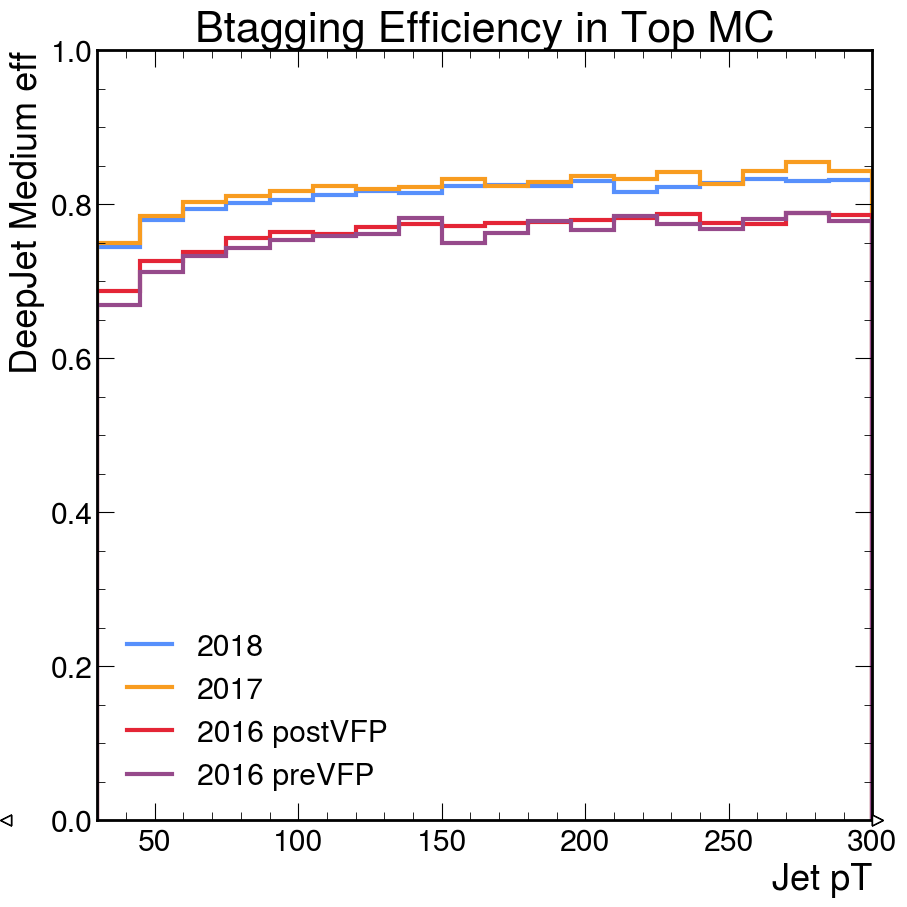

In [105]:
import mplhep as hep

hep.style.use("CMS")


eff_2018.plot(label='2018',linewidth=3)
eff_2017.plot(label='2017',linewidth=3)
eff_2016_postVFP.plot(label='2016 postVFP',linewidth=3)
eff_2016_preVFP.plot(label='2016 preVFP',linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title('Btagging Efficiency in Top MC')

plt.legend()

plt.savefig('btag_eff_Top.png',bbox_inches='tight')

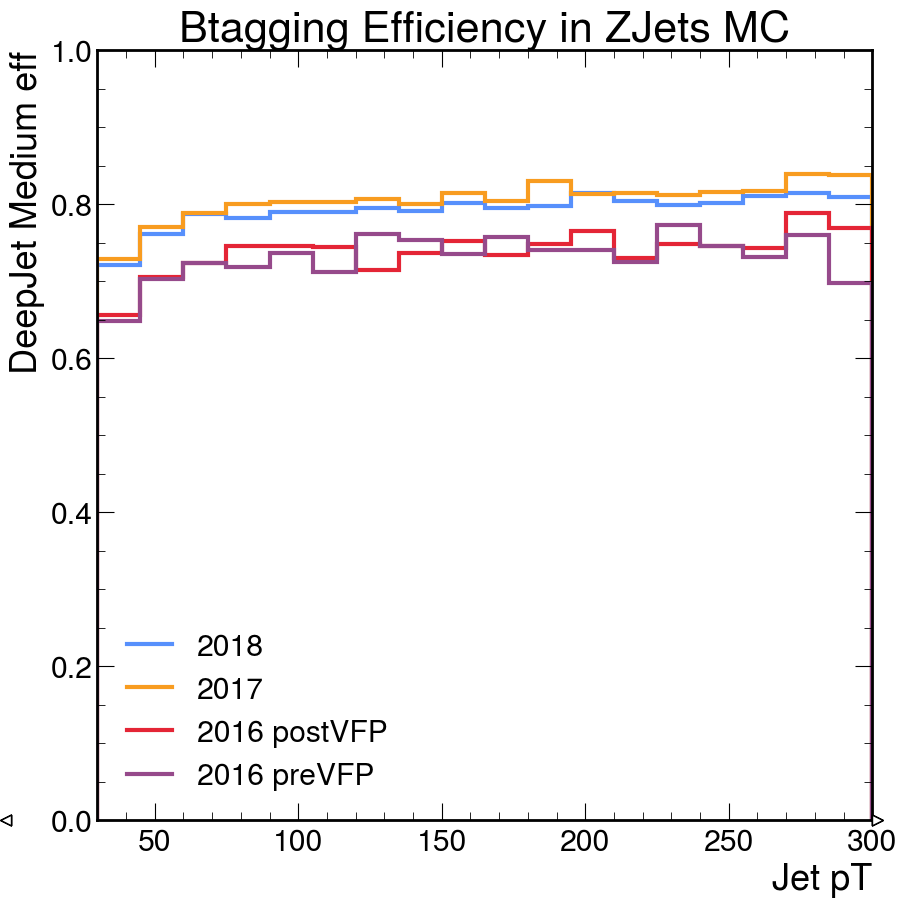

In [82]:
import mplhep as hep

hep.style.use("CMS")


eff_2018.plot(label='2018',linewidth=3)
eff_2017.plot(label='2017',linewidth=3)
eff_2016_postVFP.plot(label='2016 postVFP',linewidth=3)
eff_2016_preVFP.plot(label='2016 preVFP',linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title('Btagging Efficiency in ZJets MC')

plt.legend()

plt.savefig('btag_eff_ZJets.png',bbox_inches='tight')

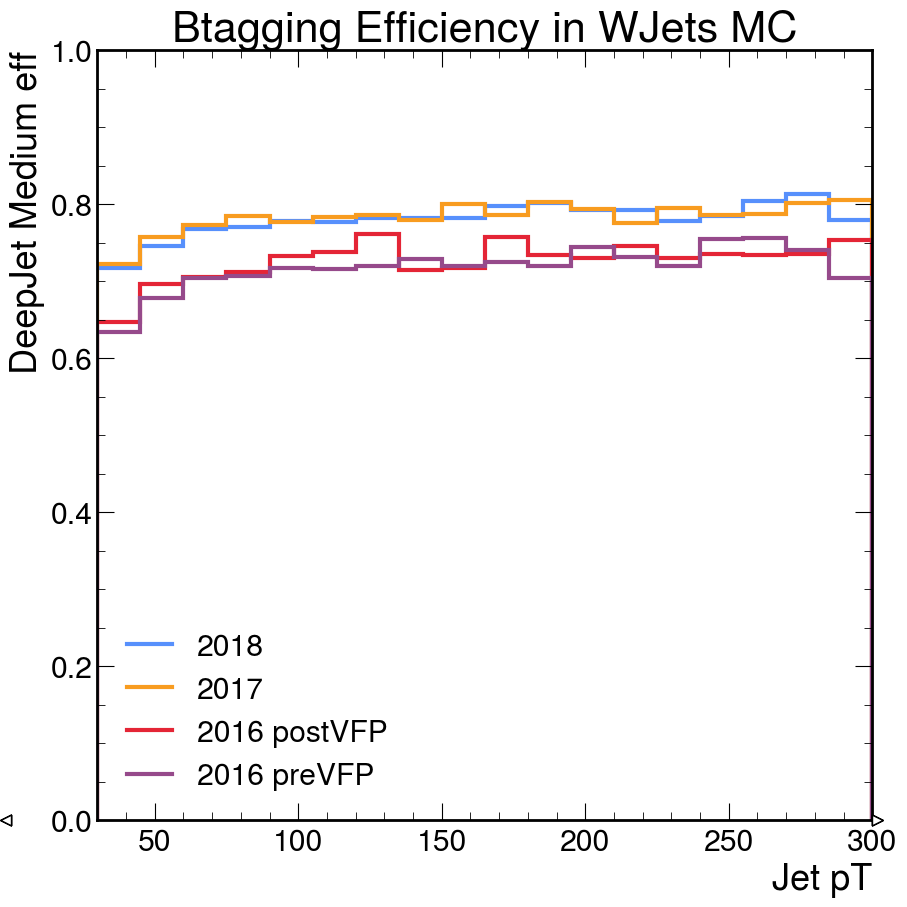

In [59]:
import mplhep as hep

hep.style.use("CMS")


eff_2018.plot(label='2018',linewidth=3)
eff_2017.plot(label='2017',linewidth=3)
eff_2016_postVFP.plot(label='2016 postVFP',linewidth=3)
eff_2016_preVFP.plot(label='2016 preVFP',linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title('Btagging Efficiency in WJets MC')

plt.legend()

plt.savefig('btag_eff_WJets.png',bbox_inches='tight')

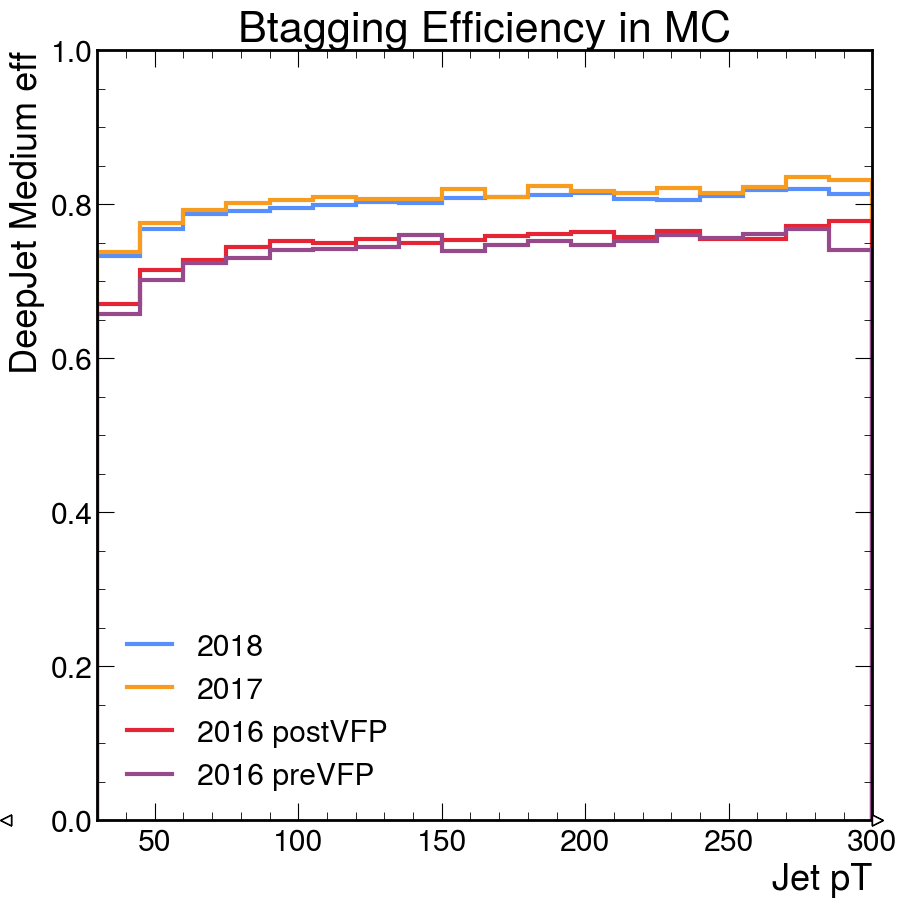

In [36]:
import mplhep as hep

hep.style.use("CMS")


eff_2018.plot(label='2018',linewidth=3)
eff_2017.plot(label='2017',linewidth=3)
eff_2016_postVFP.plot(label='2016 postVFP',linewidth=3)
eff_2016_preVFP.plot(label='2016 preVFP',linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title('Btagging Efficiency in MC')

plt.legend()

plt.savefig('btag_eff.png',bbox_inches='tight')

In [121]:
# do something like MET resolution scripts (efficiency)
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic

truth_means, bin_edges, binnumber = binned_statistic(eff_denom, eff_denom, statistic='mean', bins=binnings, range=(0, 400))

tagged_means, _, _ = binned_statistic(eff_denom, eff_num, statistic='mean', bins=binnings, range=(0, 400))

eff = tagged_means / truth_means


In [125]:
denom, _, _ = binned_statistic(eff_denom, eff_denom, statistic='mean', bins=binnings, range=(0, 400))

In [126]:
num, _, _ = binned_statistic(eff_denom, eff_num, statistic='mean', bins=binnings, range=(0, 400))

In [127]:
num / denom

array([        nan,         nan,  1.        ,         nan, -5.14217908,
        1.        ,  1.        ,  1.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])